# How to Visualise Causal Inference Models with Intuitive Conditional Probability Tables

## How to generate intuitive and comprehensive Conditional Probability Tables to visualise and understand causal inference models in 1 line of Python code

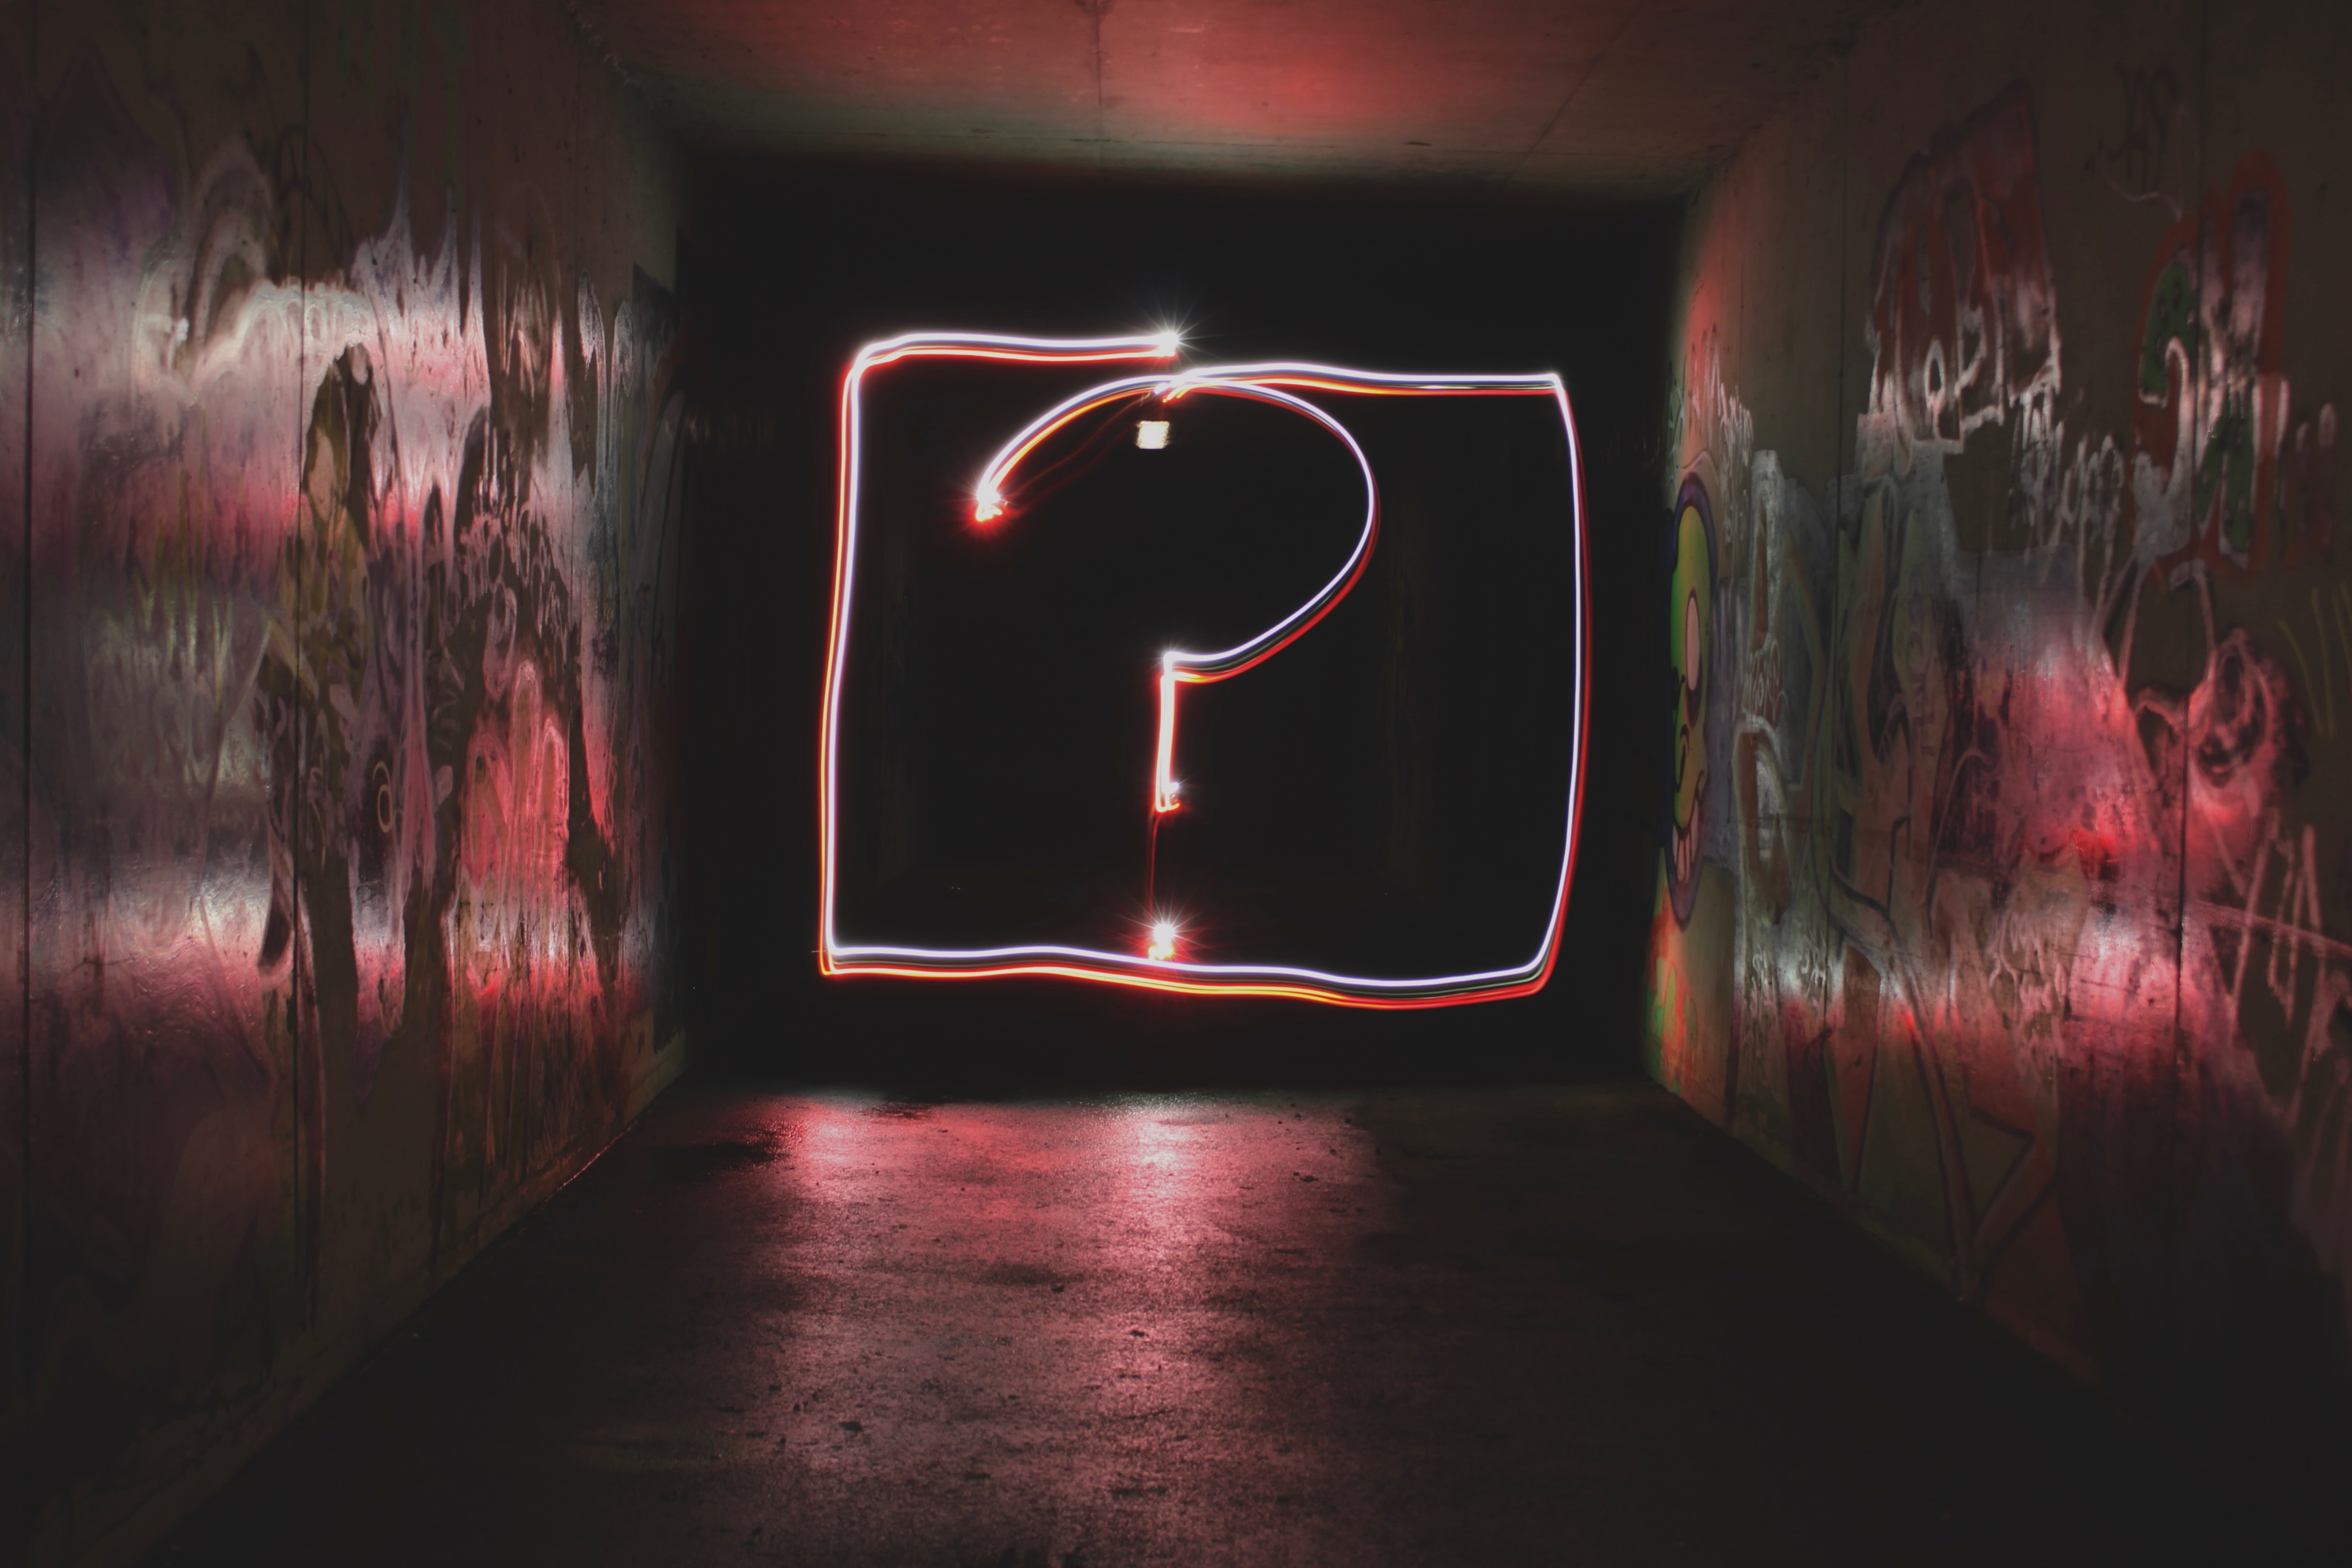
Photo by <a href="https://unsplash.com/@emilymorter?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Emily Morter</a> on <a href="https://unsplash.com/s/photos/question-mark?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Background
Causal Inference is a hot topic at the moment but the various libraries that exist can be complicated with inconsistent documentation and examples and most of the available articles and posts focus on a particular aspect of causal inference without covering all the things a data scientist needs to know.

This led to me writing a series of articles with this latest one diving into "Conditional Probability Tables" and how to generate them easily in a format that is intuitive and meaningful.

### What You Will Learn
By the end of this article you will be able to generate visually rich conditional probability tables in just a one line of Python and you will have full access to the source code and documentation!

Before we dive into the causal inference model please consider …

Joining Medium with my referral link (I will receive a proportion of the fees if you sign up using this link).

Subscribing to a free e-mail whenever I publish a new story.

Taking a quick look at my previous articles.

Downloading my free strategic data-driven decision making framework.

Visiting my data science website — The Data Blog.

... and if you are interested in Causal Inference here are the other articles in this series -
Data
Example

## A Quick Refresher on Causal Inference Models
A causal inference model consists of two key components -

1. A "Directed Acyclic Graph" (DAG) that describes what causes what, sometimes referred to as a causal inference diagram.
2. A set of "Conditional Probability Tables" (CPTs) that describe the probabilities of moving from one node to another.

Here is an example that shows how both components work together to in a causal inference model (the number in the cells are probabilities).

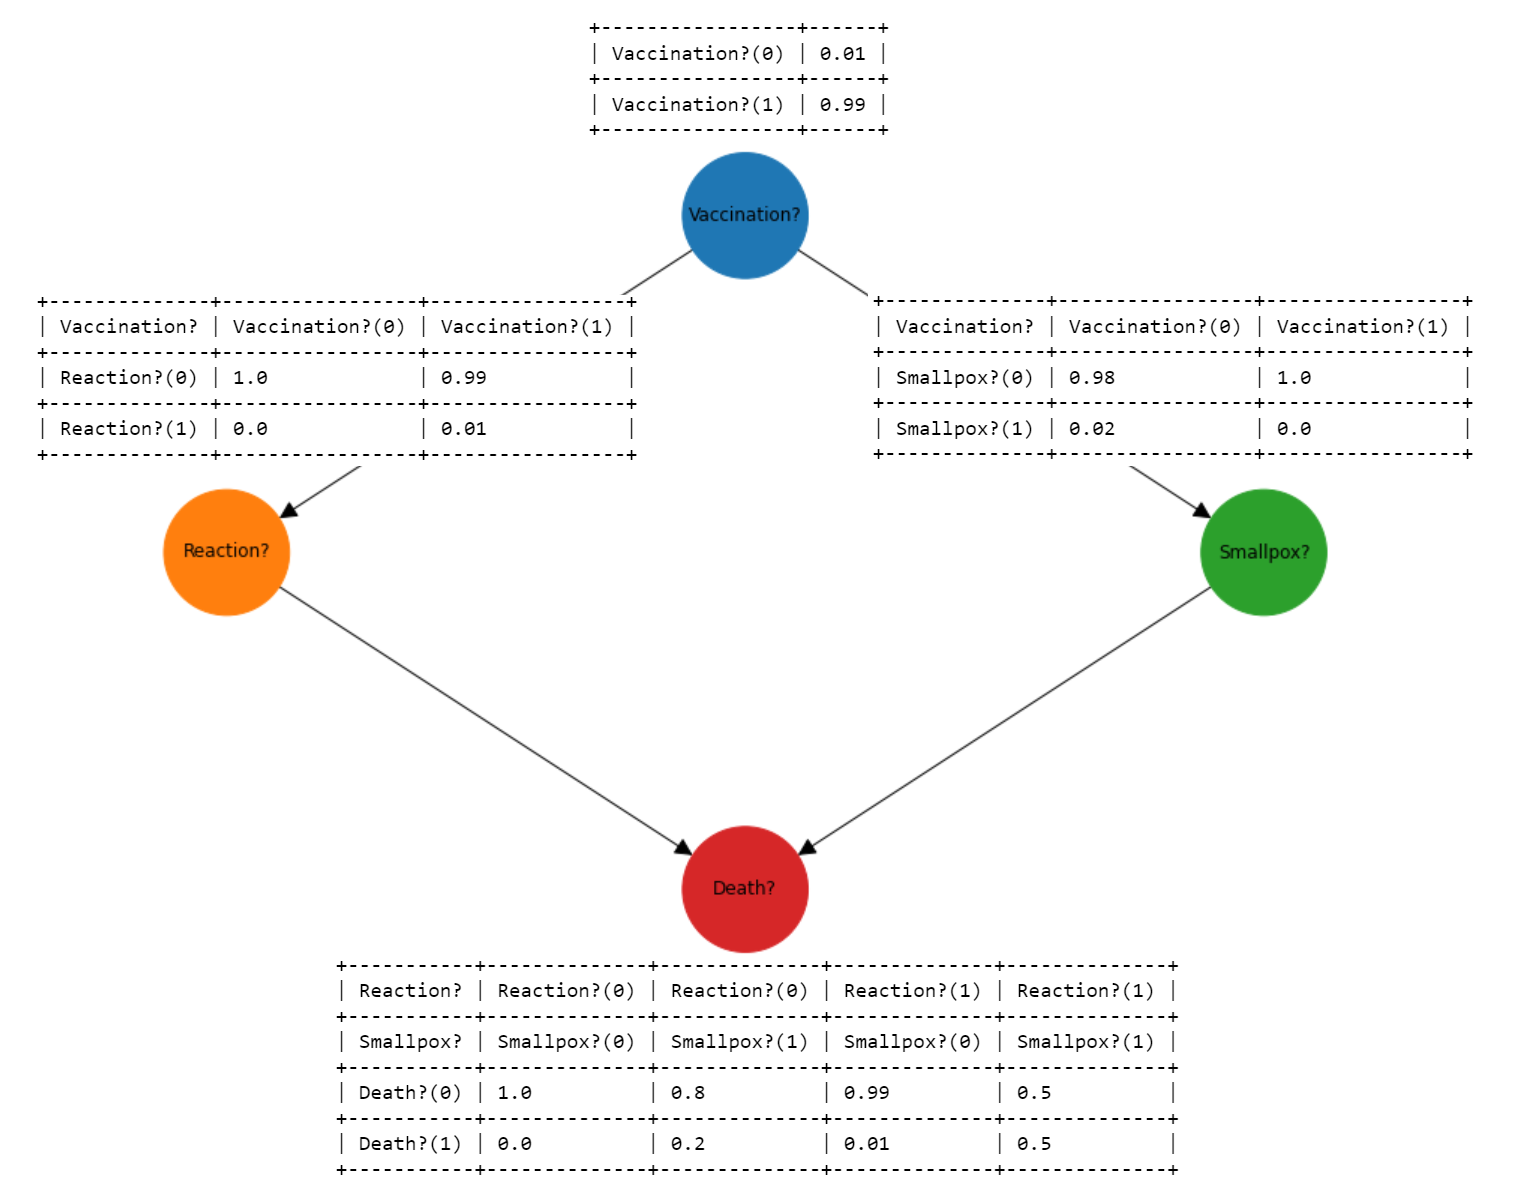

My previous article (https://towardsdatascience.com/how-to-visualise-causal-inference-models-with-interactive-directed-acyclic-graphs-8dd648a64915) dealt with visualising the DAG, the rest of this article will show how to produce the CPTs in a visually rich and intuitive way.

## Getting Started
Let's get started by choosing some data to model. 

The data I have selected relates to the impact of having a graduate degree on salary and has been obtained from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/census+income) which is free to use with an acknowledgement (see References section).

In [1]:
import pandas as pd
from IPython.display import display

df_census = pd.read_excel("data/census_income.xlsx")

display(df_census.head())
display(df_census.describe().T)

,age,hasGraduateDegree,greaterThan50k
0,39,False,False
1,50,False,False
2,38,False,False
3,53,False,False
4,37,True,False


,count,mean,std,min,25%,50%,75%,max
age,29170.0,38.655674,13.722408,17.0,28.0,37.0,48.0,90.0


## Building a Causal Model
I have chosen to build a causal model using the ``pgmpy`` library (https://pgmpy.org/) as follows ...

In [2]:
import sys
sys.path.insert(1, r'C:\Users\GHarrison\OneDrive - Lincoln College\Python Projects\Data Science\Utilities\Causal\lib')

import dag_tools
import cpt_tools

In [3]:
from pgmpy.models import BayesianNetwork

census_model = BayesianNetwork([('age', 'hasGraduateDegree'),
                                ('age', 'greaterThan50k'),
                                ('hasGraduateDegree', 'greaterThan50k')])

It is very useful to visualise the causal relationships and the structure. To get the full details and the source code for ``dag_tools.py`` please head over to my article on "How to Visualise Causal Inference Models with Interactive Directed Acyclic Graphs".

https://towardsdatascience.com/how-to-visualise-causal-inference-models-with-interactive-directed-acyclic-graphs-8dd648a64915

In [10]:
dag_tools.display_pyvis_model(census_model, figsize=(400,400))

The final step in building the model is to fit the data as follows -

In [5]:
census_model.fit(df_census)
census_model.check_model()

C:\Users\GHarrison\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\GHarrison\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


True

## Conditional Probability Tables
It is very easy to use the native functionality in the ``pgmpy`` library to take look at the CPTs ...

In [6]:
for cpt in census_model.get_cpds():
    print(cpt)

+---------+-------------+
| age(17) | 0.0128214   |
+---------+-------------+
| age(18) | 0.0179637   |
+---------+-------------+
| age(19) | 0.0225917   |
+---------+-------------+
| age(20) | 0.0236202   |
+---------+-------------+
| age(21) | 0.0223174   |
+---------+-------------+
| age(22) | 0.0234145   |
+---------+-------------+
| age(23) | 0.0264313   |
+---------+-------------+
| age(24) | 0.0241687   |
+---------+-------------+
| age(25) | 0.0251628   |
+---------+-------------+
| age(26) | 0.0237916   |
+---------+-------------+
| age(27) | 0.0249229   |
+---------+-------------+
| age(28) | 0.0257456   |
+---------+-------------+
| age(29) | 0.0242029   |
+---------+-------------+
| age(30) | 0.0256771   |
+---------+-------------+
| age(31) | 0.0269112   |
+---------+-------------+
| age(32) | 0.0251628   |
+---------+-------------+
| age(33) | 0.0264998   |
+---------+-------------+
| age(34) | 0.0268769   |
+---------+-------------+
| age(35) | 0.0270483   |
+---------+-

... but the output is unsatisfactory -

The CPT representing the probabilities for ``age`` is spread out vertically (because age has many stages, one for each age between 17 and 90)

The CPT for the probabilities of ``hasGraduateDegree`` is even worse. Because this table is spread out horizontally ``pgmpy`` has truncated all of the columns for ages 17 - 87 and just left ages 88 and 90 in the display. This might have fitted the table in the cell but the resulting truncation makes it impossible to understand what is going on.

The CPT for ``greaterThan50k`` has the same problems as ``hasGraduateDegree``.

The last problem with the ``pgmpy`` output for CPTs is that they are "upside-down". If you are a reader of Judea Pearl who has published many seminal works on causality you will have read examples where Pearl  expresses his CPTs with the "Probability" expressed in the columns and the "Given" conditions on the rows ...

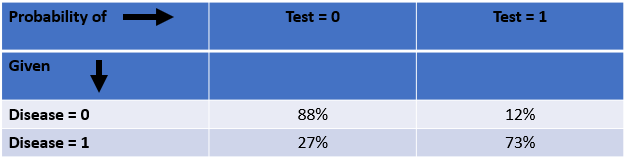

## A Better Solution
All of these issue make it very difficult to visualise what is going on in a causal model and that leads to a lack of understnading which in turn will lead to an inability to use these models to solve real-world problems for customers.

The unintuitive output of ``pgmpy`` led me to develop my own ``cpt_tools`` library to resolve all the issues (a link to the full source code is provided below).

Let's take a look at the output generated using ``cpd_tools`` ...

In [7]:
for cpt in census_model.get_cpds():
    cpt_tools.display_cpt(cpt)

Probability of age


,age,P
0,age(17),0.012821
1,age(18),0.017964
2,age(19),0.022592
3,age(20),0.023620
4,age(21),0.022317
...,...,...
68,age(85),0.000069
69,age(86),0.000034
70,age(87),0.000034
71,age(88),0.000103


Probability of hasGraduateDegree given age


"(age,)",hasGraduateDegree(False),hasGraduateDegree(True)
age(17),1.000000,0.000000
age(18),0.998092,0.001908
age(19),1.000000,0.000000
age(20),0.998549,0.001451
age(21),0.998464,0.001536
...,...,...
age(85),1.000000,0.000000
age(86),0.000000,1.000000
age(87),1.000000,0.000000
age(88),1.000000,0.000000


Probability of greaterThan50k given age, hasGraduateDegree


('age', 'hasGraduateDegree')      greaterThan50k(False)  greaterThan50k(True)
age(17) hasGraduateDegree(False)               1.000000              0.000000
        hasGraduateDegree(True)                0.500000              0.500000
age(18) hasGraduateDegree(False)               1.000000              0.000000
        hasGraduateDegree(True)                1.000000              0.000000
age(19) hasGraduateDegree(False)               0.996965              0.003035
...                                                 ...                   ...
age(87) hasGraduateDegree(True)                0.500000              0.500000
age(88) hasGraduateDegree(False)               1.000000              0.000000
        hasGraduateDegree(True)                0.500000              0.500000
age(90) hasGraduateDegree(False)               0.909091              0.090909
        hasGraduateDegree(True)                0.250000              0.750000

[146 rows x 2 columns]

This is looking much nicer in just 1 line of Python code from the ``cpt_tools`` library!

The tables are laid out in DataFrame output and the truncation has taken place against the Y-axis (rows) to give the best compromise between readability and space-utilisation.

If you would like to see the whole CPT without the horizontal truncation, simply change the pandas ``display.max_rows`` parameter and then use ``cpt_tools.display_cpt`` as follows -

In [8]:
pd.set_option('display.max_rows', None)
cpt_tools.display_cpt(census_model.get_cpds()[2])
pd.reset_option('display.max_rows')

Probability of greaterThan50k given age, hasGraduateDegree


('age', 'hasGraduateDegree')      greaterThan50k(False)  greaterThan50k(True)
age(17) hasGraduateDegree(False)               1.000000              0.000000
        hasGraduateDegree(True)                0.500000              0.500000
age(18) hasGraduateDegree(False)               1.000000              0.000000
        hasGraduateDegree(True)                1.000000              0.000000
age(19) hasGraduateDegree(False)               0.996965              0.003035
        hasGraduateDegree(True)                0.500000              0.500000
age(20) hasGraduateDegree(False)               1.000000              0.000000
        hasGraduateDegree(True)                1.000000              0.000000
age(21) hasGraduateDegree(False)               0.996923              0.003077
        hasGraduateDegree(True)                1.000000              0.000000
age(22) hasGraduateDegree(False)               0.985359              0.014641
        hasGraduateDegree(True)                0.500000              0.500000
age(23) hasGraduateDegree(False)               0.986962              0.013038
        hasGraduateDegree(True)                1.000000              0.000000
age(24) hasGraduateDegree(False)               0.962590              0.037410
        hasGraduateDegree(True)                0.900000              0.100000
age(25) hasGraduateDegree(False)               0.931083              0.068917
        hasGraduateDegree(True)                0.913043              0.086957
age(26) hasGraduateDegree(False)               0.913303              0.086697
        hasGraduateDegree(True)                0.880000              0.120000
age(27) hasGraduateDegree(False)               0.901130              0.098870
        hasGraduateDegree(True)                0.947368              0.052632
age(28) hasGraduateDegree(False)               0.863260              0.136740
        hasGraduateDegree(True)                0.592593              0.407407
age(29) hasGraduateDegree(False)               0.835052              0.164948
        hasGraduateDegree(True)                0.703704              0.296296
age(30) hasGraduateDegree(False)               0.810179              0.189821
        hasGraduateDegree(True)                0.363636              0.636364
age(31) hasGraduateDegree(False)               0.794974              0.205026
        hasGraduateDegree(True)                0.586207              0.413793
age(32) hasGraduateDegree(False)               0.764539              0.235461
        hasGraduateDegree(True)                0.620690              0.379310
age(33) hasGraduateDegree(False)               0.782904              0.217096
        hasGraduateDegree(True)                0.500000              0.500000
age(34) hasGraduateDegree(False)               0.735570              0.264430
        hasGraduateDegree(True)                0.564103              0.435897
age(35) hasGraduateDegree(False)               0.782956              0.217044
        hasGraduateDegree(True)                0.342105              0.657895
age(36) hasGraduateDegree(False)               0.717105              0.282895
        hasGraduateDegree(True)                0.365854              0.634146
age(37) hasGraduateDegree(False)               0.667590              0.332410
        hasGraduateDegree(True)                0.375000              0.625000
age(38) hasGraduateDegree(False)               0.666667              0.333333
        hasGraduateDegree(True)                0.303030              0.696970
age(39) hasGraduateDegree(False)               0.685377              0.314623
        hasGraduateDegree(True)                0.375000              0.625000
age(40) hasGraduateDegree(False)               0.675676              0.324324
        hasGraduateDegree(True)                0.454545              0.545455
age(41) hasGraduateDegree(False)               0.657364              0.342636
        hasGraduateDegree(True)                0.466667              0.533333
age(42) hasGraduateDeg

### Source Code
The full source code can be found here and the documentation can be found here.

https://gist.github.com/grahamharrison68/1187c53d078c3c899b534852fe8edf9c
https://raw.githack.com/grahamharrison68/Public-Github/master/Causal%20Inference/files/cpt_tools.html

... and the GitHub repository for all the code and data in this notebook can be found here ...

https://github.com/grahamharrison68/Public-Github/tree/master/Causal%20Inference

If you do decide to download and use the code it would be really nice if you would consider buying me a coffee - https://ko-fi.com/grahamharrison

### Conclusion

Causal inference is a great tool to have in your data science toolkit but to use causal inference to solve a business problem you need to be able to visualise the directed acyclic graphs and the conditional probability tables.

The ``pgmpy`` library is comprehensive and easy to use but the functionality for visualising the models can benefit from being extended and improved.

This article has shown how to visualise the CPTs in a way that is powerfully visual, intuitive and easy to understand in just one line of Python code.

If you enjoyed this article please consider …

## References
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.